<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [11]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2, n_classes=2, weights=[0.7], class_sep=0.7,
                           random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [12]:
# you can write your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=40)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(3000, 5) (3000,)
(1000, 5) (1000,)
(1000, 5) (1000,)


In [13]:
C=100
gamma = 0.001
svm_clf = SVC(C=100, gamma=0.001).fit(X_train, y_train)

sv = svm_clf.support_vectors_    # sv = suport vectors
b = svm_clf.intercept_[0]        # b = intercept
y_alpha = svm_clf.dual_coef_[0]  # alpha is called dual coeffecient

In [14]:
def decision_function(X_cv, sv, y_alpha, b, gamma):
    K = lambda sv, xq : np.exp(-gamma * np.sum((sv-xq)**2, axis=1))
    return np.array(list(map(lambda xq : (y_alpha*K(sv, xq)).sum()+b,  X_cv)))

f_cv = decision_function(X_cv, sv, y_alpha, b, gamma)
f_cv

array([-2.29550545e+00, -6.58118675e-02,  2.60545348e+00, -3.38776635e-01,
       -2.48379228e+00, -2.75478841e-01,  2.57684336e+00,  1.46912682e+00,
       -2.26307925e+00, -5.88559904e-01, -1.81020995e+00, -2.93811765e+00,
       -2.94234745e+00, -5.39621469e+00,  2.29079050e+00, -1.68899100e+00,
       -1.05206787e+00, -2.65480890e+00, -1.65262604e+00, -6.85439071e-01,
        2.98018638e+00, -4.25518289e+00,  1.39449457e+00, -1.71698612e+00,
        1.18157541e+00, -3.61532890e+00,  3.08183738e+00,  1.70608589e+00,
       -3.16340511e+00,  1.57649639e-01, -2.97124205e+00, -2.17472600e+00,
       -2.07994542e+00, -1.05787043e+00, -3.03986941e+00, -3.06148387e+00,
        2.31203796e+00, -4.04672055e+00, -2.40847023e+00,  1.83198140e+00,
       -2.82016656e+00, -2.52967151e+00,  1.48069121e+00, -1.32821811e+00,
        2.04607466e+00, -2.90979445e+00, -3.45431672e+00, -2.94276356e+00,
        2.07224211e+00, -2.73149853e+00, -2.30207788e+00, -2.38103244e+00,
       -2.34401234e+00, -

In [15]:
svm_clf.decision_function(X_cv)

array([-2.29550545e+00, -6.58118675e-02,  2.60545348e+00, -3.38776635e-01,
       -2.48379228e+00, -2.75478841e-01,  2.57684336e+00,  1.46912682e+00,
       -2.26307925e+00, -5.88559904e-01, -1.81020995e+00, -2.93811765e+00,
       -2.94234745e+00, -5.39621469e+00,  2.29079050e+00, -1.68899100e+00,
       -1.05206787e+00, -2.65480890e+00, -1.65262604e+00, -6.85439071e-01,
        2.98018638e+00, -4.25518289e+00,  1.39449457e+00, -1.71698612e+00,
        1.18157541e+00, -3.61532890e+00,  3.08183738e+00,  1.70608589e+00,
       -3.16340511e+00,  1.57649639e-01, -2.97124205e+00, -2.17472600e+00,
       -2.07994542e+00, -1.05787043e+00, -3.03986941e+00, -3.06148387e+00,
        2.31203796e+00, -4.04672055e+00, -2.40847023e+00,  1.83198140e+00,
       -2.82016656e+00, -2.52967151e+00,  1.48069121e+00, -1.32821811e+00,
        2.04607466e+00, -2.90979445e+00, -3.45431672e+00, -2.94276356e+00,
        2.07224211e+00, -2.73149853e+00, -2.30207788e+00, -2.38103244e+00,
       -2.34401234e+00, -

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [16]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    return np.zeros_like(dim), 0   # w = np.zeros_like(dim),  b = 0
# ------------------------------------------------------------------
def gradient_dw(x, y, w, b, alpha):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = np.dot( y-sigmoid( np.dot(x, w)+b ), x ) - (alpha/len(x))*w
    return dw
# ----------------------------------------------------------------
def gradient_db(x, y, w, b):
    '''In this function, we will compute gradient w.r.to b '''
    db = np.sum(y - sigmoid( np.dot(x, w)+b))
    return db
# -----------------------------------------------------------------
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    return 1 / (1 + np.exp(-z))
# --------------------------------------------------------------
def logloss(y_cv_modified, f_cv_pred):
    '''In this function, we will compute log loss with Platt Scaling '''
    loss = (-1/len(y_cv_modified)) * np.sum(y_cv_modified*np.log10(f_cv_pred) + (1-y_cv_modified)*np.log10(1-f_cv_pred))
    return loss
# -----------------------------------------------------------------
def display(f_cv_loss):
    plt.plot(np.arange(len(f_cv_loss)), f_cv_loss, label='f_cv error')
    plt.title('f_cv error for each epoch after Platt Scaling', fontsize=20, fontfamily='serif')
    plt.xlabel('epochs', fontsize=16, fontfamily='serif')
    plt.ylabel('log_loss', fontsize=16, fontfamily='serif')
    plt.grid()
    plt.legend();
# =================================================================

def SGD(f_cv, y_cv_modified, epochs, alpha, eta0):
    f_cv_loss = []
    w, b = initialize_weights(f_cv[0])
    for epoch in range(epochs):
        w = w + eta0 * gradient_dw(f_cv, y_cv_modified, w, b, alpha)
        b = b + eta0 * gradient_db(f_cv, y_cv_modified, w, b)
        
        f_cv_pred = sigmoid(b + np.dot(f_cv, w))
        loss_f_cv = logloss(y_cv_modified, f_cv_pred)
        
#         comparing the privious and current log_loss till four decimal digits.
        if len(f_cv_loss) != 0:
            if np.round(loss_f_cv, 4) == np.round(f_cv_loss[-1], 4):
                print(loss_tr, f_cv_loss[-1])
                break
        f_cv_loss.append(loss_f_cv)
    display(f_cv_loss)    
    return w,b

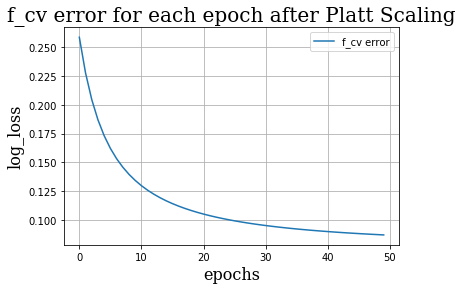

In [17]:
def main():
    alpha = 0.0001
    eta0 = 0.0001
    epochs = 50

    # calculating the value of N_positive and N_negative using y_train.
    N_positive, N_negative = Counter(y_train)[1], Counter(y_train)[0]
    y_positive, y_negative = (N_positive+1)/(N_positive+2), 1/(N_negative+2)

    # modigying y_cv 
    y_cv_modified = np.where(y_cv==1, y_positive, y_negative)
    N = len(f_cv)

    w,b = SGD(f_cv, y_cv_modified, epochs, alpha, eta0)
    
if __name__=='__main__':
    main()